In [ ]:
# https://dspillustrations.com/pages/posts/misc/eye-diagram-examples.html
# https://dspillustrations.com/pages/posts/misc/python-ofdm-example.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
# Mod type key and value
BPSK = 'bpsk'
QPSK = 'qpsk'
EPSK = '8psk'

VALID_MOD = [BPSK, QPSK, EPSK]

BPSK_SYM = np.array([-1+0j,1+0j])
# QPSK_SYM = (np.sqrt(2) / 2) * np.array([1+1j, 1-1j, -1+1j, -1-1j])

QPSK_SYM = np.array([
    np.exp(1j * np.pi / 4),      # 45 degrees
    np.exp(1j * 3 * np.pi / 4),  # 135 degrees
    np.exp(1j * 5 * np.pi / 4),  # 225 degrees
    np.exp(1j * 7 * np.pi / 4),  # 315 degrees
])

EPSK_SYM = np.array([
    np.exp(1j * 0),          # 0 degrees
    np.exp(1j * np.pi / 4),  # 45 degrees
    np.exp(1j * np.pi / 2),  # 90 degrees
    np.exp(1j * 3 * np.pi / 4),  # 135 degrees
    np.exp(1j * np.pi),      # 180 degrees
    np.exp(1j * 5 * np.pi / 4),  # 225 degrees
    np.exp(1j * 3 * np.pi / 2),  # 270 degrees
    np.exp(1j * 7 * np.pi / 4)  # 315 degrees
])

# todo add QAM

# Create a mapping dictionary
symbol_to_bits = {
    BPSK: {BPSK_SYM[0]: (0,),   BPSK_SYM[1]: (1,)},
    QPSK: {QPSK_SYM[0]: (0, 0), QPSK_SYM[1]: (0, 1), QPSK_SYM[2]: (1, 0), QPSK_SYM[3]: (1, 1)},
    EPSK: {
        EPSK_SYM[0]: (0, 0, 0),
        EPSK_SYM[1]: (0, 0, 1),
        EPSK_SYM[2]: (0, 1, 0),
        EPSK_SYM[3]: (0, 1, 1),
        EPSK_SYM[4]: (1, 0, 0),
        EPSK_SYM[5]: (1, 0, 1),
        EPSK_SYM[6]: (1, 1, 0),
        EPSK_SYM[7]: (1, 1, 1),
          }
    }

# Example usage:
bpsk_symbol = BPSK_SYM[0]
qpsk_symbol = QPSK_SYM[2]
epsk_symbol = EPSK_SYM[1]

bits_bpsk = symbol_to_bits[BPSK][bpsk_symbol]
bits_qpsk = symbol_to_bits[QPSK][qpsk_symbol]
bits_epsk = symbol_to_bits[EPSK][epsk_symbol]

print("BPSK Symbol:", bpsk_symbol, "Mapped Bits:", bits_bpsk)
print("QPSK Symbol:", qpsk_symbol, "Mapped Bits:", bits_qpsk)
print("8PSK Symbol:", epsk_symbol, "Mapped Bits:", bits_epsk)

#######################################

# Reverse the symbol-to-bit mapping for BPSK
bits_to_symbol_bpsk = {v: k for k, v in symbol_to_bits[BPSK].items()}

# Reverse the symbol-to-bit mapping for QPSK
bits_to_symbol_qpsk = {v: k for k, v in symbol_to_bits[QPSK].items()}

# Reverse the symbol-to-bit mapping for 8PSK
bits_to_symbol_epsk = {v: k for k, v in symbol_to_bits[EPSK].items()}

# Combine the bit-to-symbol mappings into a single dictionary
bit_to_symbol_map = {
    BPSK: bits_to_symbol_bpsk,
    QPSK: bits_to_symbol_qpsk,
    EPSK: bits_to_symbol_epsk,
}

# Example usage:
bits_bpsk = (0,)
bits_qpsk = (1, 0)
bits_epsk = (0, 0, 1)
symbol_bpsk = bit_to_symbol_map[BPSK][bits_bpsk]
symbol_qpsk = bit_to_symbol_map[QPSK][bits_qpsk]
symbol_epsk = bit_to_symbol_map[EPSK][bits_epsk]

print("BPSK Bits:", bits_bpsk, "Mapped Symbol:", symbol_bpsk)
print("QPSK Bits:", bits_qpsk, "Mapped Symbol:", symbol_qpsk)
print("8PSK Bits:", bits_epsk, "Mapped Symbol:", symbol_epsk)


BPSK Symbol: (-1+0j) Mapped Bits: (0,)
QPSK Symbol: (-0.7071067811865477-0.7071067811865475j) Mapped Bits: (1, 0)
8PSK Symbol: (0.7071067811865476+0.7071067811865475j) Mapped Bits: (0, 0, 1)
BPSK Bits: (0,) Mapped Symbol: (-1+0j)
QPSK Bits: (1, 0) Mapped Symbol: (-0.7071067811865477-0.7071067811865475j)
8PSK Bits: (0, 0, 1) Mapped Symbol: (0.7071067811865476+0.7071067811865475j)


In [3]:
def plot_complex(complex_signal):
    # Separate the real and imaginary parts
    real_part = np.real(complex_signal)
    imaginary_part = np.imag(complex_signal)

    # Create timing bins (assuming 16 bins for your data)
    timing_bins = range(len(complex_signal))

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot the real part with "*" markers
    ax1.plot(timing_bins, real_part, label='Real Part', color='blue', marker='*')
    ax1.set_ylabel('Real Part')
    ax1.legend()
    ax1.grid(True)
    ax1.set_title('Real Part vs. Timing Bin')

    # Plot the imaginary part with "*" markers
    ax2.plot(timing_bins, imaginary_part, label='Imaginary Part', color='orange', marker='*')
    ax2.set_xlabel('Timing Bin')
    ax2.set_ylabel('Imaginary Part')
    ax2.legend()
    ax2.grid(True)
    ax2.set_title('Imaginary Part vs. Timing Bin')

    plt.tight_layout()
    plt.show()

In [19]:
def plot_constellation(complex_signal):
    # Separate the real and imaginary parts
    real_part = np.real(complex_signal)
    imaginary_part = np.imag(complex_signal)
    print(f"number of signal bin: {len(real_part)}")
    
    # Create a constellation plot
    plt.figure(figsize=(6, 6))
    plt.scatter(real_part, imaginary_part, marker='o', color='r')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Constellation Diagram')
    plt.grid(True)
    plt.show()

In [20]:
def plot_timing(signal, sig_rate):
    """
    Plot the signal over time.

    Parameters:
        signal (np.array): signal values.
        sig_rate (float): signal rate rate in .
    """
    plt.figure(figsize=(10, 3))
    time = np.arange(0, len(signal)) / sig_rate
    plt.plot(time, signal)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Signal")
    plt.grid(True)
    plt.show()

In [21]:
def plot_binary_sig(signal):
    """
    Plot the signal over time.

    Parameters:
        signal (np.array): signal values.
        sig_rate (float): signal rate rate in .
    """
    plt.figure(figsize=(10, 3))
    time = np.arange(0, len(signal))
    plt.plot(time, signal)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Signal")
    plt.grid(True)
    plt.show()

In [22]:
def _valid_check(mod_typ:str):
    '''check if the modulation type are supported'''
    assert mod_typ in VALID_MOD, f"not supported mode type {mod_typ}"
    pass

In [8]:
def symbol_rate (mod_typ = BPSK):
    if    mod_typ == BPSK: return 1
    elif  mod_typ == QPSK: return 2
    elif  mod_typ == EPSK: return 3
    else:  return None

In [9]:
def gen_pattern (mod_typ = BPSK):
    if    mod_typ == BPSK: return BPSK_SYM
    elif  mod_typ == QPSK: return QPSK_SYM
    elif  mod_typ == EPSK: return EPSK_SYM
    else:  return None

In [10]:
def bits_to_symbols_bak(bits, mod_type=BPSK):
    _valid_check(mod_type)
    bit_num_per_symbol = symbol_rate (mod_type)

    symbols = []
    for i in range(0, len(bits), bit_num_per_symbol):
        symbol_bits = bits[i:i+bit_num_per_symbol]
        if mod_type == BPSK:
            symbol = np.array([-1 + 0j]) if symbol_bits[0] else np.array([1 + 0j])
        elif mod_type == QPSK:
            phase  = np.pi / 4 * (2 * symbol_bits[0] + symbol_bits[1])
            symbol = np.array([np.exp(1j * phase)])
        elif mod_type == EPSK:
            gray_code = symbol_bits.dot(2 ** np.arange(len(symbol_bits)))
            phase = 2 * np.pi * gray_code / 8
            symbol = np.array([np.exp(1j * phase)])
        symbols.append(symbol)
    
    return symbols

    

In [28]:
def bits_to_symbols(bits, mod_type=BPSK):
    _valid_check(mod_type)
    bit_num_per_symbol = symbol_rate (mod_type)
    
    symbols = []
    for i in range(0, len(bits), bit_num_per_symbol):
        symbol_bits = tuple(bits[i:i+bit_num_per_symbol])
#         print(f"len(symbol_bits)= {len(symbol_bits)}")
        if   mod_type == BPSK:
            symbol = bit_to_symbol_map[BPSK][symbol_bits]
        elif mod_type == QPSK:
            symbol = bit_to_symbol_map[QPSK][symbol_bits]
        elif mod_type == EPSK:
            symbol = bit_to_symbol_map[EPSK][symbol_bits]

        symbols.append(symbol)
    
    return symbols

In [29]:
def gen_binary_signal(num_bits, pattern=None):
    if pattern is None:
        signal = np.random.randint(0, 2, num_bits)
    else:
        pattern_len = len(pattern)
        repetitions = num_bits // pattern_len
        signal = np.tile(pattern, repetitions)
        remainder = num_bits % pattern_len
        signal = np.concatenate((signal, pattern[:remainder]))
    return signal

In [30]:
def test_binary_signal(num_bits, pattern=None):
    text = "Custom Pattern: " if pattern == None else "Random Pattern: " 
    binary_signal = gen_binary_signal(num_bits, pattern=pattern)
    print(text, "\n" ,binary_signal)
    plot_binary_sig(binary_signal)
    

Custom Pattern:  
 [0 0 0 1]


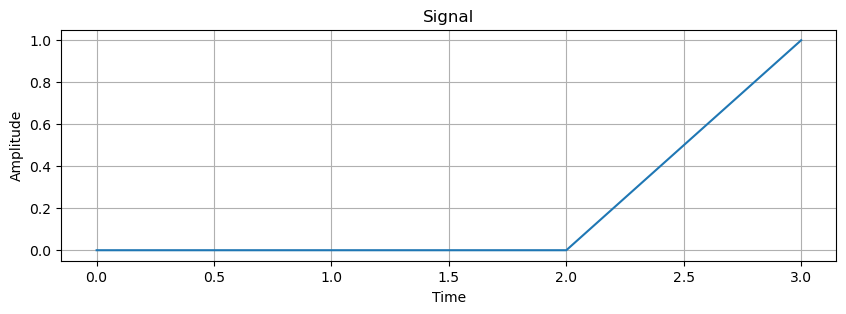

Random Pattern:  
 [0. 1. 0. 1.]


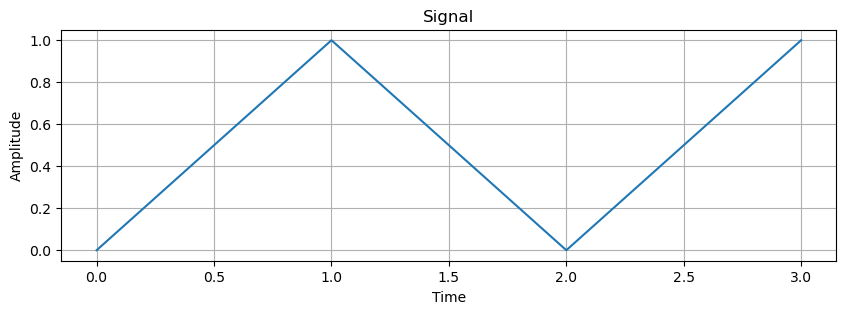

In [31]:
# Example usage:
num_bits = 4

# Generate a signal with a random pattern
test_binary_signal(num_bits)

# Generate a signal with a specified pattern
custom_pattern = [0, 1]
test_binary_signal(num_bits, pattern=custom_pattern)


In [32]:
def gen_symbol_signal(num_symbs, pattern=None, mod_typ=QPSK):
    _valid_check(mod_typ)
    bit_num_per_symbol = symbol_rate (mod_typ)
    num_bits = num_symbs * bit_num_per_symbol
    bin_signal = gen_binary_signal(num_bits, pattern)
    symbols = bits_to_symbols(bin_signal, mod_typ)   
    return symbols
    

In [33]:
def test_symbol_signal(num_symbs, pattern=None, mod=QPSK):
    text = f"Custom Pattern ({mod}): " if pattern == None else f"Random Pattern({mod}): " 
    symbol_signal = gen_symbol_signal(num_symbs, pattern, mod)
    # print(text, "\n" ,symbol_signal)
    plot_complex(symbol_signal)
    plot_constellation(symbol_signal)

Custom Pattern (qpsk):  
 [(-0.7071067811865477-0.7071067811865475j), (0.7071067811865474-0.7071067811865477j), (0.7071067811865474-0.7071067811865477j), (-0.7071067811865477-0.7071067811865475j)]


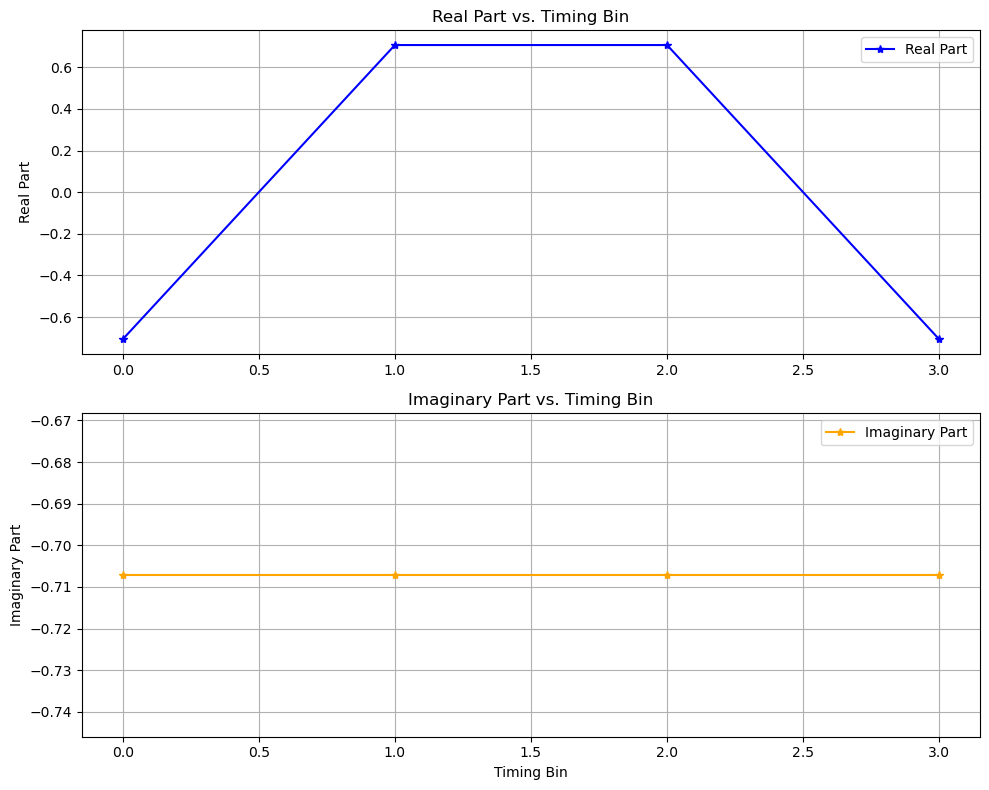

number of signal bin: 4


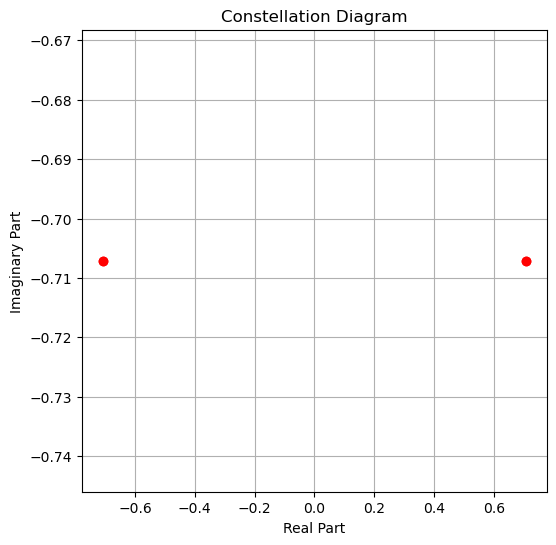

Random Pattern(qpsk):  
 [(-0.7071067811865475+0.7071067811865476j), (-0.7071067811865475+0.7071067811865476j), (-0.7071067811865475+0.7071067811865476j), (-0.7071067811865475+0.7071067811865476j)]


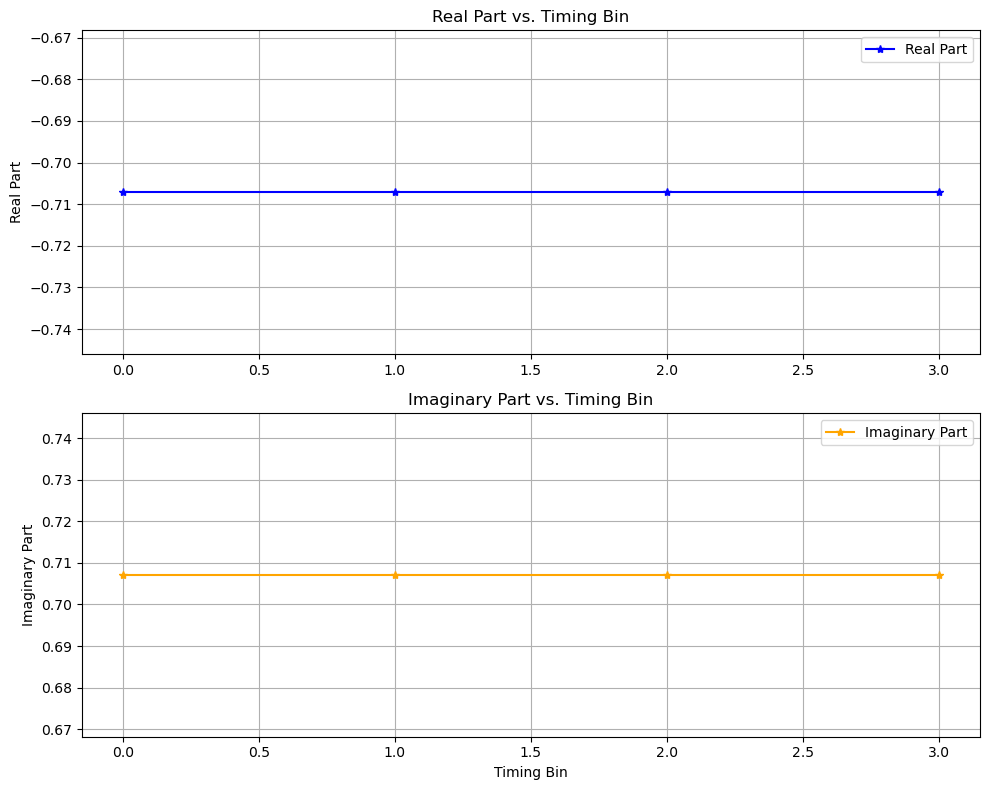

number of signal bin: 4


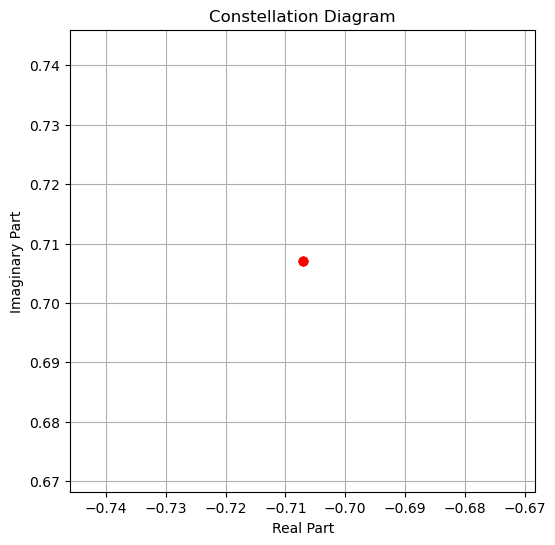

In [34]:
# Example usage:
num_symbs = 4
test_symbol_signal(num_symbs)
test_symbol_signal(num_symbs, custom_pattern, QPSK)


In [35]:
def upsample_signal(signal, upsample_factor=4):
    
    upsampled_signal = np.repeat(signal, upsample_factor)
    
    #print(upsampled_signal)
    
#     # Replace all values with the constant_value
#     upsampled_signal = np.where(upsampled_signal == 0, constant_value, upsampled_signal)
#     print(upsampled_signal)
    
    return upsampled_signal

In [72]:
def test_upsampled_signal(num_symbls, upsample_factor, pattern=None, mod=QPSK):
    text = f"Custom Pattern ({mod}): " if pattern == None else f"Random Pattern({mod}): " 
    symbol_signal = gen_symbol_signal(num_symbs, pattern, mod)
    plot_complex(symbol_signal)
    upsampled_signal = upsample_signal(symbol_signal, upsample_factor)
    #print(text, "\n" , upsampled_signal)
    plot_complex(upsampled_signal)
    plot_constellation(upsampled_signal)


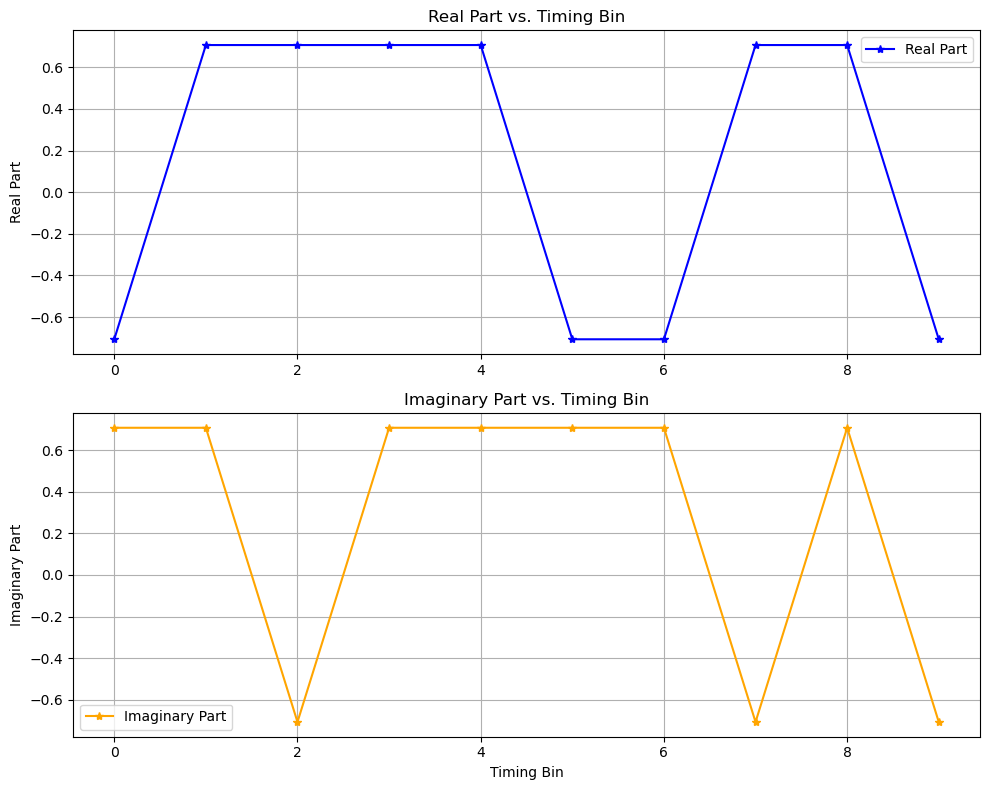

[-0.70710678+0.70710678j -0.70710678+0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j  0.70710678+0.70710678j  0.70710678+0.70710678j
  0.70710678+0.70710678j  0.70710678+0.70710678j  0.70710678-0.70710678j
  0.70710678-0.70710678j  0.70710678-0.70710678j  0.70710678-0.70710678j
  0.70710678+0.70710678j  0.70710678+0.70710678j  0.70710678+0.70710678j
  0.70710678+0.70710678j  0.70710678+0.70710678j  0.70710678+0.70710678j
  0.70710678+0.70710678j  0.70710678+0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j -0.70710678+0.70710678j -0.70710678+0.70710678j
 -0.70710678+0.70710678j  0.70710678-0.70710678j  0.70710678-0.70710678j
  0.70710678-0.70710678j  0.70710678-0.70710678j  0.70710678+0.70710678j
  0.70710678+0.70710678j  0.70710678+0.70710678j  0.70710678+0.70710678j
 -0.70710678-0.70710678j -0.70710678-0.70710678j -0.70710678-0.70710678j
 -0.70710678-0.70710678j]


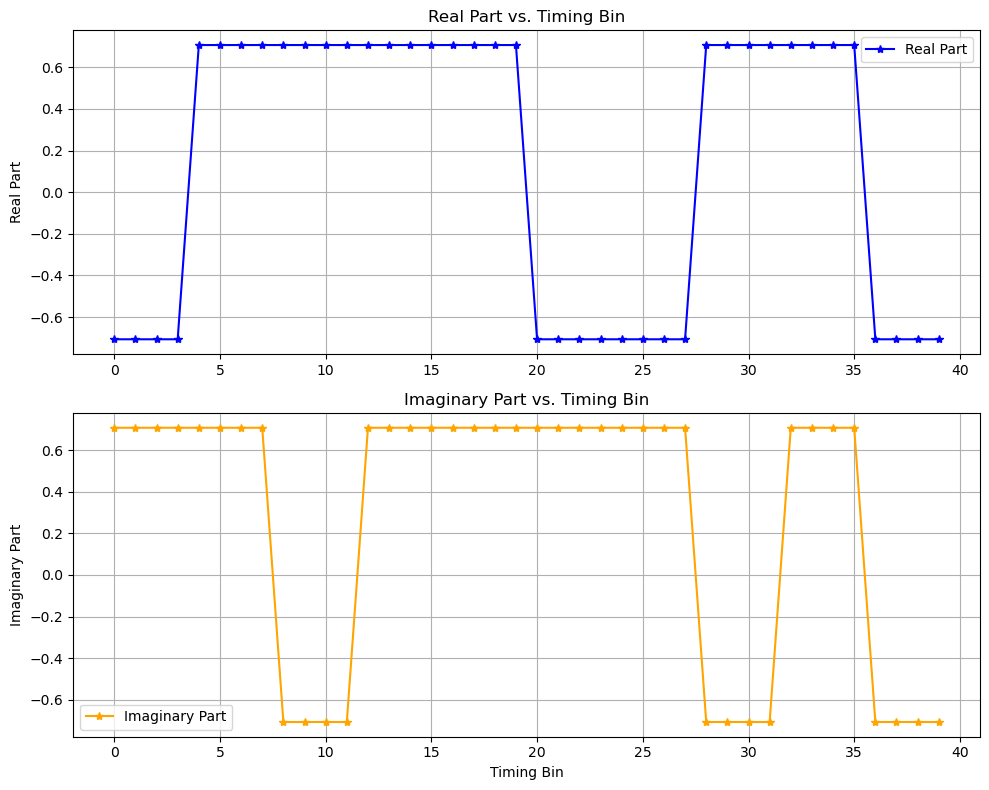

number of signal bin: 40


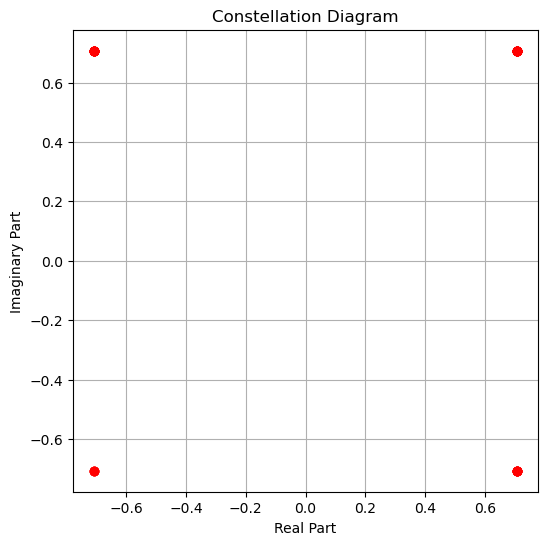

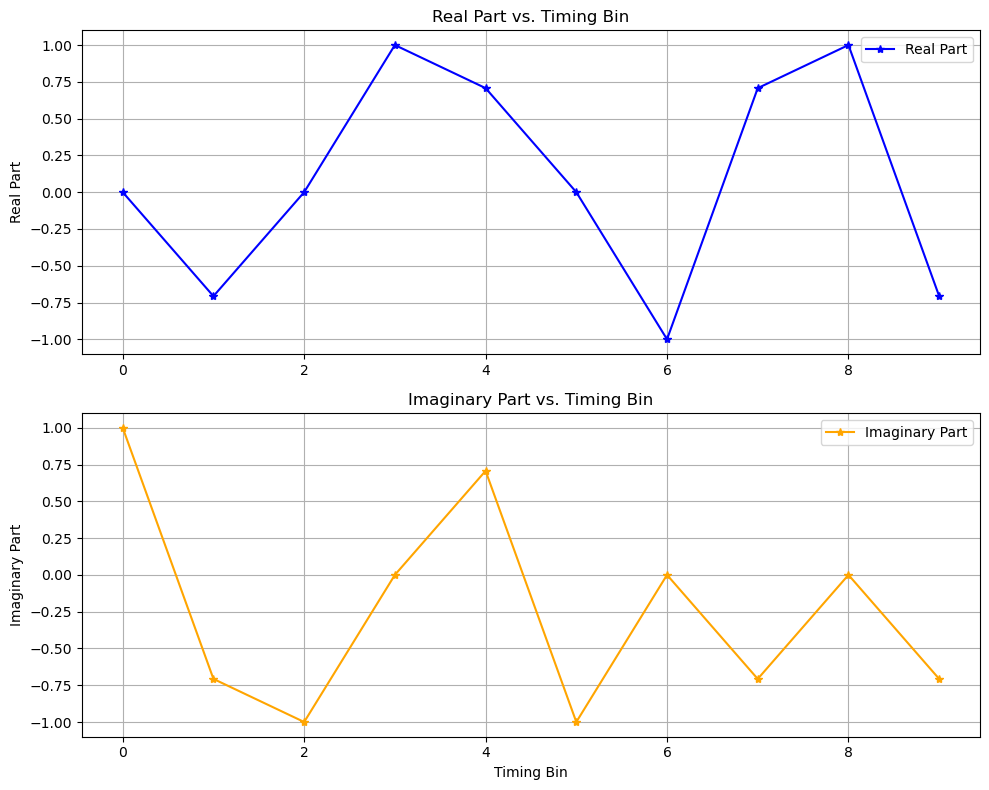

[ 6.12323400e-17+1.00000000e+00j  6.12323400e-17+1.00000000e+00j
  6.12323400e-17+1.00000000e+00j  6.12323400e-17+1.00000000e+00j
 -7.07106781e-01-7.07106781e-01j -7.07106781e-01-7.07106781e-01j
 -7.07106781e-01-7.07106781e-01j -7.07106781e-01-7.07106781e-01j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
  1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  7.07106781e-01+7.07106781e-01j  7.07106781e-01+7.07106781e-01j
  7.07106781e-01+7.07106781e-01j  7.07106781e-01+7.07106781e-01j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
 -1.00000000e+00+1.22464680e-16j -1.00000000e+00+1.22464680e-16j
 -1.00000000e+00+1.22464680e-16j -1.00000000e+00+1.22464680e-16j
  7.07106781e-01-7.07106781e-01j  7.07106781e-01-7.07106781e-01j
  7.07106781e-01-7.071067

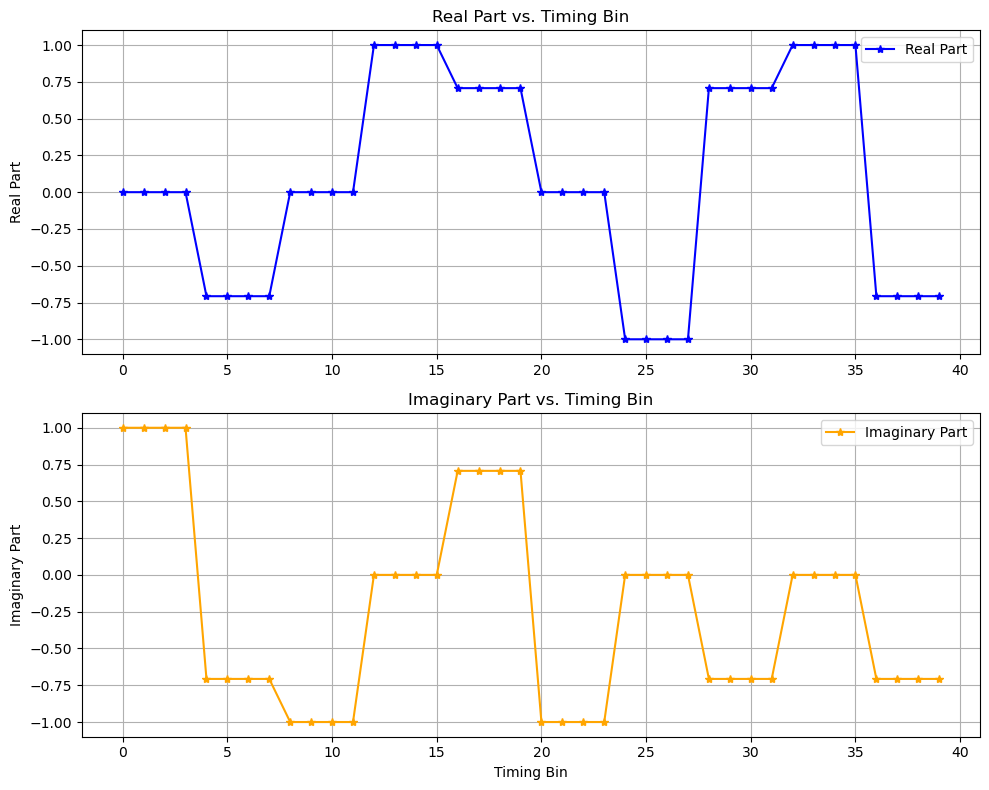

number of signal bin: 40


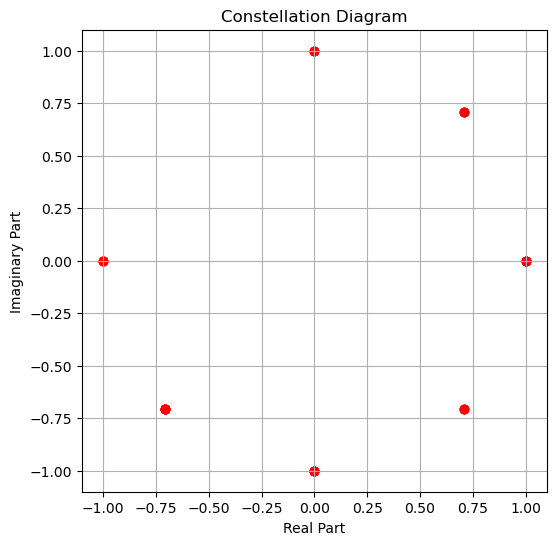

In [73]:
# Example usage:
num_symbs = 10
upsample_factor = 4

test_upsampled_signal(num_symbs, upsample_factor)
# custom_pattern = [0, 1]
test_upsampled_signal(num_symbs, upsample_factor, None, EPSK)


In [42]:
def pulseShape(raw_symbol, pulseshape):
    #conv_signal = np.convolve(raw_symbol, pulseshape, mode='full')[:len(raw_symbol)]
    return np.convolve(raw_symbol, pulseshape, mode='full')[:len(raw_symbol)]

In [43]:
# Create the QPSK symbol map:
# https://www.wavewalkerdsp.com/2022/06/08/building-a-psk-and-qam-modulator-in-python/
# pulseshape
# https://pysdr.org/content/pulse_shaping.html

In [61]:
def rc_filter(sample_per_symbol, num_taps:int = 101, beta:float = 0.35):
#     num_taps = 101
#     beta = 0.35
    Ts = sample_per_symbol 
    t = np.arange(num_taps) - (num_taps-1)//2
    h = 1/Ts*np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
    return t, h

In [62]:
def plot_filter(t,h):
    plt.plot(t, h, '.')
    plt.grid(True)
    plt.show()

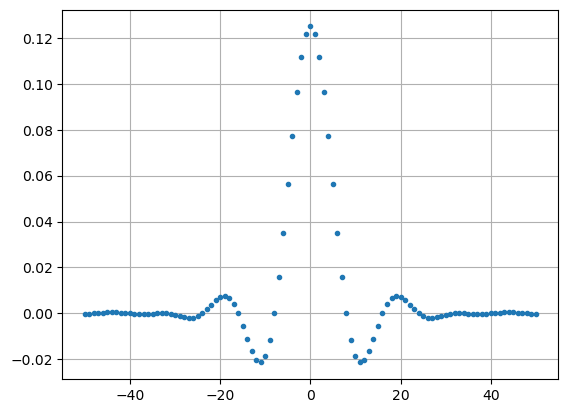

In [63]:
num_taps = 101
beta = 0.35
sps = 8
t, h = rc_filter(sps,num_taps, beta)
plot_filter (t,h)
    

In [50]:
def rrc_filter(N, alpha):
    n = np.arange(-N/2, N/2)
    h = np.sinc(n) * np.cos(np.pi * alpha * n) / (1 - (2 * alpha * n)**2)
    return h / np.sum(h)

In [64]:
def filer_gen(num_symbls, upsample_factor, type_: str = 'rrc'):
    #bin_num = num_symbls * upsample_factor # double check
    bin_num = num_symbls
    if   type_ == 'rrc': return rrc_filter(bin_num, 0.35)
    elif type_ == 'one': return np.ones(bin_num)
    elif type_ == 'rc':  _, h = rc_filter(upsample_factor); return h
    else:
        pass


In [75]:
def test_pulseshape(num_symbls, upsample_factor, pattern=None, mod=QPSK, filter_type='rrc'):
    text = f"Custom Pattern ({mod}): " if pattern == None else f"Random Pattern({mod}): " 
    symbol_signal = gen_symbol_signal(num_symbls, pattern, mod)
    upsampled_signal = upsample_signal(symbol_signal, upsample_factor)
    plot_complex(upsampled_signal)
    plot_constellation(upsampled_signal)
    
    # apply pulseshape filter
    filter_ = filer_gen(num_symbls, upsample_factor, filter_type)
    pulseShapedSignal = pulseShape(upsampled_signal, filter_)
#     print(text, "\n" , pulseShapedSignal)
    plot_complex(pulseShapedSignal)
    plot_constellation(pulseShapedSignal)
    

[-7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
 -7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
 -7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
 -7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
  1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
 -1.83697020e-16-1.00000000e+00j -1.83697020e-16-1.00000000e+00j
 -1.00000000e+00+1.22464680e-16j -1.00000000e+00+1.22464680e-16j
 -1.00000000e+00+1.22464680e-16j -1.00000000e+00+1.22464680e-16j
 -1.00000000e+00+1.22464680e-16j -1.00000000e+00+1.22464680e-16j
 -1.00000000e+00+1.224646

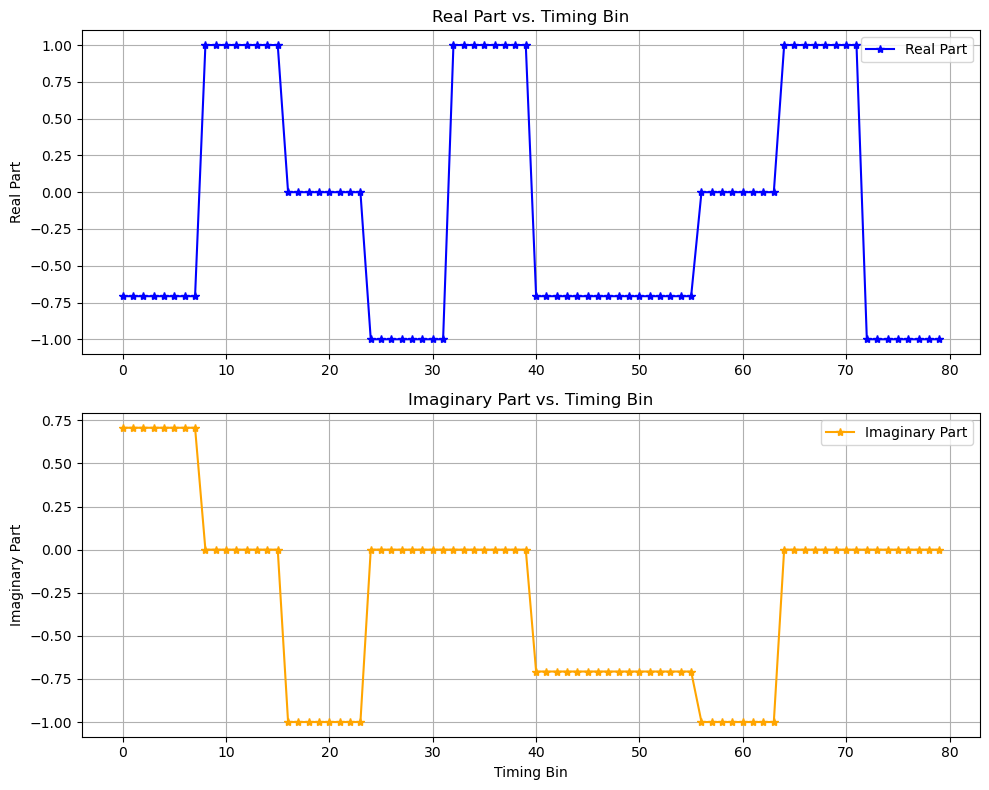

number of signal bin: 80


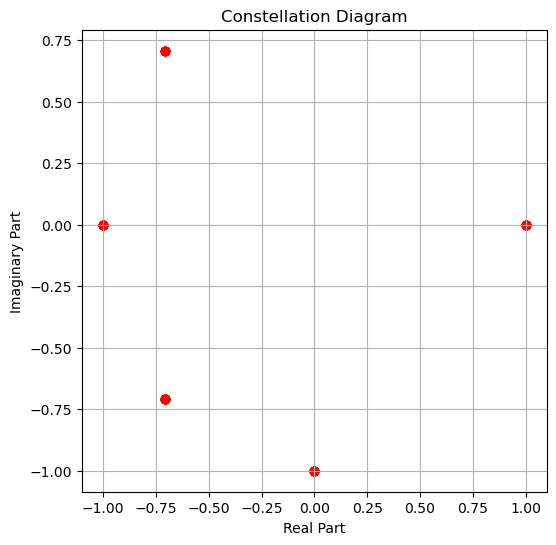

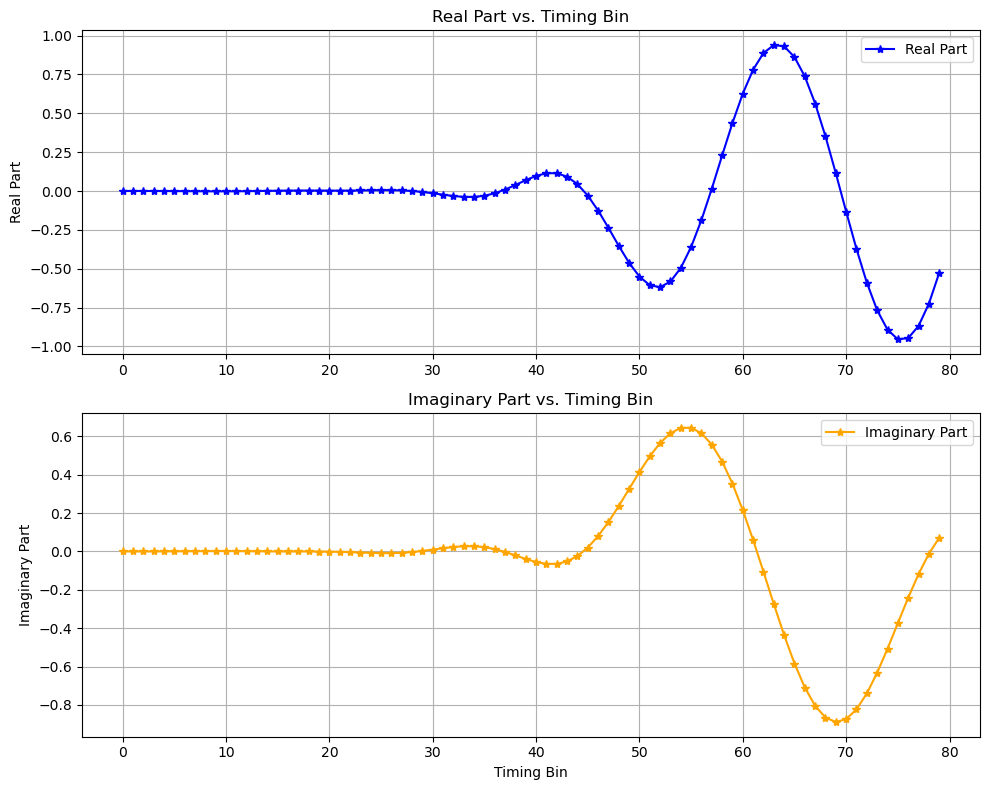

number of signal bin: 80


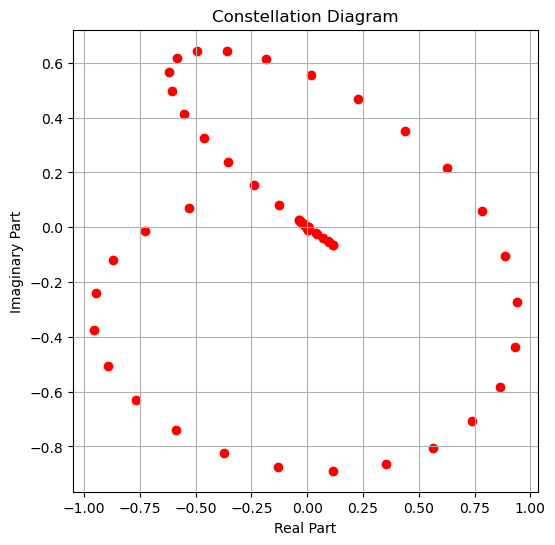

In [76]:
# Example usage:
num_symbs = 10
upsample_factor = 8
# test_upsampled_signal(num_symbs, upsample_factor, None, EPSK)
test_pulseshape(num_symbs, upsample_factor, None, EPSK, 'rc')

In [ ]:
plot_complex(upsampled_random_symbol_signal)

In [ ]:
upsampled_random_symbol_signal

In [ ]:
plot_const(upsampled_random_symbol_signal)